In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [ ]:
import torch

# 1. Tanítható súly létrehozása
W = torch.tensor(2.0, requires_grad=True)
x = torch.tensor(3.0)  # bemenet
target = torch.tensor(12.0)  # kívánt kimenet
learning_rate = 0.1
print(f"Bemenet: {x.item():.4f}")
print(f"Kezdő W érték: {W.item():.4f}")
print(f"Kívánt Bemenet: {target.item():.4f}")

# 2. Előrefelé számolás: y = W * x
y = W * x
print(f"Kimenet (y): {y.item():.4f}")

# 3. Loss számítása: négyzetes hiba
loss = (y - target) ** 2
print(f"Loss: {loss.item():.4f}")

# 4. Visszaterjesztés (gradiens számítás)
loss.backward()

print(f"W gradiens: {W.grad.item():.4f}")

# 5. Súlyfrissítés (gradient descent)
with torch.no_grad():  # ne építsen számítási gráfot
    W.data = W.data - learning_rate * W.grad

# 6. Gradiens kinullázása
W.grad.zero_()

# 7. Új előrefelé számolás az új W-vel
y_new = W * x
loss_new = (y_new - target) ** 2

print(f"\n🔁 Frissített W: {W.item():.4f}")
print(f"Új kimenet (y): {y_new.item():.4f}")
print(f"Új loss: {loss_new.item():.4f}")



loss_new.backward()
print(f"W gradiens: {W.grad.item():.4f}")
# 5. Súlyfrissítés (gradient descent)
with torch.no_grad():  # ne építsen számítási gráfot
    W.data = W.data - learning_rate * W.grad

# 6. Gradiens kinullázása
W.grad.zero_()

# 7. Új előrefelé számolás az új W-vel
y_new = W * x
loss_new = (y_new - target) ** 2

print(f"\n🔁 Frissített W: {W.item():.4f}")
print(f"Új kimenet (y): {y_new.item():.4f}")
print(f"Új loss: {loss_new.item():.4f}")


Bemenet: 3.0000
Kezdő W érték: 2.0000
Kívánt Bemenet: 12.0000
Kimenet (y): 6.0000
Loss: 36.0000
W gradiens: -36.0000

🔁 Frissített W: 5.6000
Új kimenet (y): 16.8000
Új loss: 23.0400
W gradiens: 28.8000

🔁 Frissített W: 2.7200
Új kimenet (y): 8.1600
Új loss: 14.7456


In [8]:
W = torch.tensor(2.0, requires_grad=True)
x = torch.tensor(3.0)

y = W * x
loss = (y - 12.0)**2

print(loss.grad_fn)      # PowBackward0
print(y.grad_fn)         # MulBackward0
print(W.grad_fn)         # None → mert ez nem számításból jött, hanem kézzel lett megadva


None


Step  1 | W: 5.6000 | y: 6.0000 | Loss: 36.0000
Step  2 | W: 2.7200 | y: 16.8000 | Loss: 23.0400
Step  3 | W: 5.0240 | y: 8.1600 | Loss: 14.7456
Step  4 | W: 3.1808 | y: 15.0720 | Loss: 9.4372
Step  5 | W: 4.6554 | y: 9.5424 | Loss: 6.0398
Step  6 | W: 3.4757 | y: 13.9661 | Loss: 3.8655
Step  7 | W: 4.4194 | y: 10.4271 | Loss: 2.4739
Step  8 | W: 3.6645 | y: 13.2583 | Loss: 1.5833
Step  9 | W: 4.2684 | y: 10.9934 | Loss: 1.0133
Step 10 | W: 3.7853 | y: 12.8053 | Loss: 0.6485
Step 11 | W: 4.1718 | y: 11.3558 | Loss: 0.4151
Step 12 | W: 3.8626 | y: 12.5154 | Loss: 0.2656
Step 13 | W: 4.1100 | y: 11.5877 | Loss: 0.1700
Step 14 | W: 3.9120 | y: 12.3299 | Loss: 0.1088
Step 15 | W: 4.0704 | y: 11.7361 | Loss: 0.0696
Step 16 | W: 3.9437 | y: 12.2111 | Loss: 0.0446
Step 17 | W: 4.0450 | y: 11.8311 | Loss: 0.0285
Step 18 | W: 3.9640 | y: 12.1351 | Loss: 0.0183
Step 19 | W: 4.0288 | y: 11.8919 | Loss: 0.0117
Step 20 | W: 3.9769 | y: 12.0865 | Loss: 0.0075
Step 21 | W: 4.0184 | y: 11.9308 | Loss:

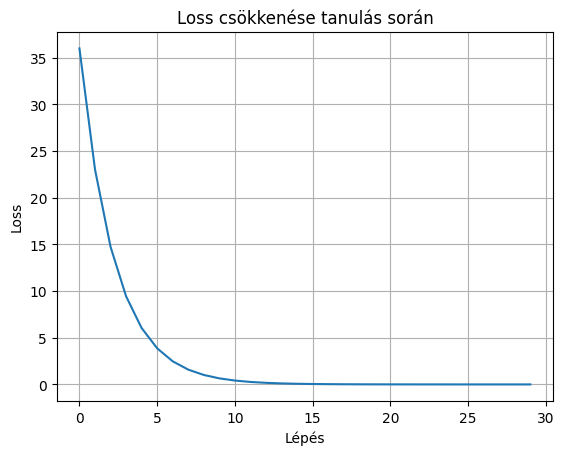

In [9]:
import torch
import matplotlib.pyplot as plt

# Tanítható paraméter (súly)
W = torch.tensor(2.0, requires_grad=True)

# Fix bemenet és célérték
x = torch.tensor(3.0)
target = torch.tensor(12.0)

# Tanulási ráta
lr = 0.1

# Loss nyomon követése
loss_history = []

# Tréning ciklus (pl. 30 lépés)
for step in range(30):
    # 1. Előrehaladás (modell számol)
    y = W * x
    loss = (y - target) ** 2

    # 2. Loss eltárolása
    loss_history.append(loss.item())

    # 3. Visszaterjesztés
    loss.backward()

    # 4. Súly frissítése (gradient descent)
    with torch.no_grad():
        W.data -= lr * W.grad

    # 5. Gradiens kinullázása
    W.grad.zero_()

    # 6. Kiírás
    print(f"Step {step+1:2d} | W: {W.item():.4f} | y: {y.item():.4f} | Loss: {loss.item():.4f}")

# Loss alakulásának ábrázolása
plt.plot(loss_history)
plt.xlabel("Lépés")
plt.ylabel("Loss")
plt.title("Loss csökkenése tanulás során")
plt.grid(True)
plt.show()
